# DATA

In [1]:
%load_ext autoreload
%autoreload 2
import genericIO
import SepVector
import Hypercube
import numpy as np
import Operator
import time

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


In [2]:
n1 = 100
n2 = 100 
n3 = 44

d1 = 20
d2 = 15
d3 = 1

o1 = 0
o2 = 0
o3 = 1

slowL = SepVector.getSepVector(Hypercube.hypercube(ns=[n1,n2,n3],ds=[d1,d2,d3],os=[o1,o2,o3]),storage='dataComplex')
slow2d = SepVector.getSepVector(Hypercube.hypercube(ns=[n1,n2],ds=[d1,d2],os=[o1,o2]),storage='dataComplex')

slowNd = slowL.getNdArray()
slowNd[:].real = 1/2000
# slowNd[:,int(1.5*n2/2)::,:].real = 1/3000
slowNd[:] *= slowNd[:]

slow2dNd = slow2d.getNdArray()
slow2dNd[:] = slowNd[0,:,:]

In [3]:
import newExtWEM 
import json

par = {
    "ns" : 1,
    "dsx" : d1,
    "osx" : 0,
    "dsz" : 0,
    "osz" : 50,
    
    "nr" : 100,
    "drx" : d1,
    "orx" : 0,
    "drz" : 0,
    "orz" : 900,
    "onepass" : 1,
    "eps" : 0,
    
    "fmax" : 15,
    "fmin" : 1,   
    
    "nref" : 1,
    "tap" : 50,
    "pad" : 50,
    "ngs" : 3,
    "ngr" : 3,
    "prop" : 'ssf',
    
    "ntaylor" : 1,
    
}


ot = 0
tmax = 3
dt = 0.004
nt = int((tmax-ot) / dt)
wave = SepVector.getSepVector(Hypercube.hypercube(ns=[nt],ds=[dt],os=[ot]))
waveNd = wave.getNdArray()
t = np.linspace(ot,tmax,nt) - .5
f0 = 5
waveNd[:] = (1-2*(np.pi*f0*t)**2)* np.exp(-(np.pi*f0*t)**2)

data = SepVector.getSepVector(Hypercube.hypercube(ns=[n3,par["nr"],par["ns"]],
                                                  ds=[dt,par["drx"],par["dsx"]],
                                                  os=[ot,par["orx"],par["osx"]]),storage='dataComplex')

parObj = genericIO.pythonParams(par).getCpp()

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


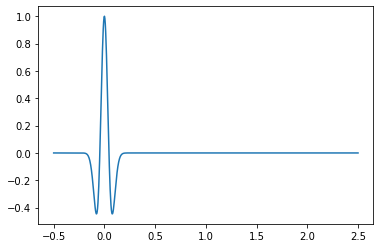

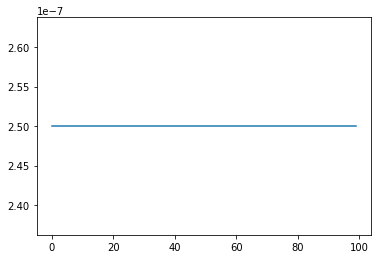

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# waveNd = np.roll(waveNd,shift=-125)

plt.figure()
plt.plot(t,waveNd)

plt.figure()
plt.plot(slow2dNd[:,0])

## Forward ext Born

# Extended Born

In [5]:
import newExtWEM

bornExt = newExtWEM.extBorn(slowL,data,wave,parObj)
# bornExt = Op.ChainOperator(bornExt,sm2)
image3d = slowL.clone()
image3dnd = image3d.getNdArray()

fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 100


In [6]:
# add an impulse
val = 1
image3dnd[20,50,50] = val

In [ ]:
bornExt.forward(False,image3d,data)

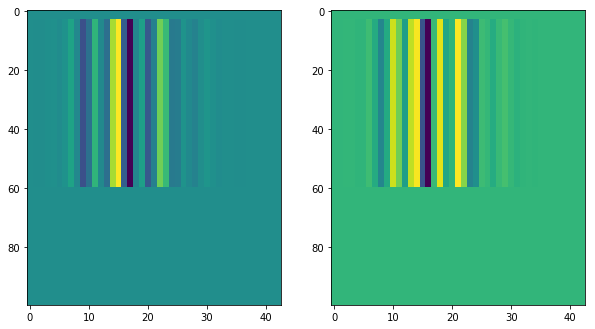

In [15]:
datNd = data.getNdArray()

# Frequency-to-time image

(750, 100, 100)


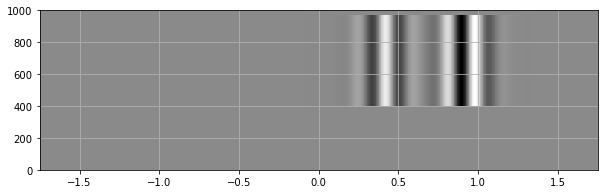

In [16]:
import numpy as np
f0 = par["fmin"]
df = 1/(tmax + 0.5 + par["tpad"]*dt)
im3d_time = np.zeros((nt+par["tpad"],im3d.shape[1],im3d.shape[2]),dtype=complex)
im3d_time[int(f0/df):n3+int(f0/df),:,:] = im3d[:]
im3d_time = np.fft.ifft(im3d_time,axis=0)
print(im3d_time.shape)
mat = np.fft.fftshift(im3d_time[:,:,50].T.real,axes=1)

plt.figure(figsize=[10,5])
plt.imshow(mat,cmap='gray',aspect=.001,extent=[-(tmax+0.5+ par["tpad"]*dt)/2,(tmax+.5+ par["tpad"]*dt)/2,0,1000])
plt.grid()

## Forward Born

In [17]:
bornData = fm.clone()
bornExt.forward(False,image3d,bornData)

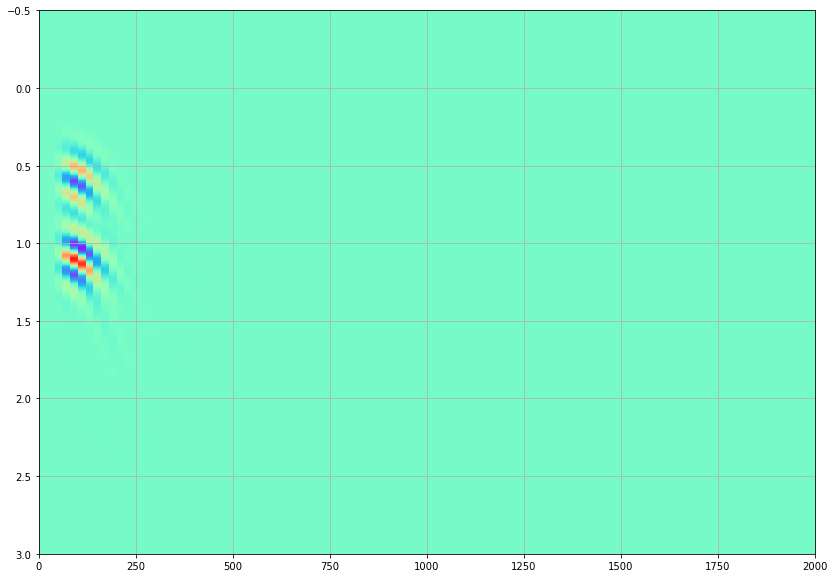

In [18]:
plt.figure(figsize=[20,10])
# plt.imshow(fm.getNdArray()[0,:,:].T,aspect=200,extent=[0,2000,3,-.5])
plt.imshow(bornData.getNdArray()[0,:,:].T,aspect=400,extent=[0,2000,3,-.5],cmap='rainbow',alpha=.9)
plt.grid()

In [19]:
pclip = 90
clip = np.percentile(bornData.getNdArray()[0,:,:],pclip)
clipped = np.clip(bornData.getNdArray()[0,:,:],a_min=-clip,a_max=clip)

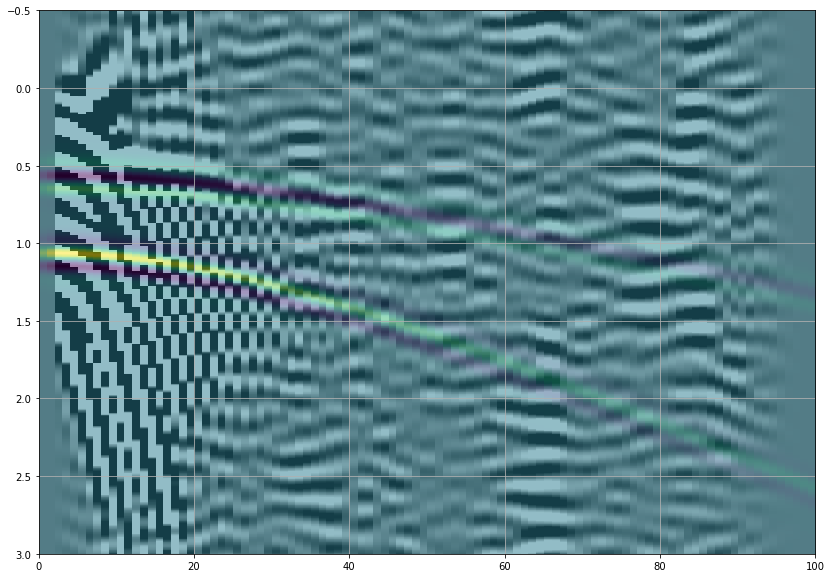

In [20]:
plt.figure(figsize=[20,10])
plt.imshow(fm.getNdArray()[0,:,:].T,aspect=20,extent=[0,100,3,-.5])
plt.imshow(clipped.T,aspect=20,extent=[0,100,3,-.5],cmap='gray',alpha=.5)
plt.grid()